## Introduction to Deep Learning with Keras

### Basics
* A network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape = (1, ), activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [6]:
# model compilation
import numpy as np
model.compile(optimizer = 'adam', loss = 'mse')

# model training
X_train = np.array([])
y_train = np.array([])
model.fit(X_train, y_train, epochs = 5)  # not defined at the moment

# predict
preds = model.predict(X_test)

# evaluation
model.evaluate(X_train, y_train)

### Surviving a Meteor Strike

* A meteor is about to strike earth. We have data on the trajectory of a previous meteor for a duration of 20minutes. We train our model using this and use it to predict the trajectory of the current meteor for a duration of 80 minutes. (t-40 to t+40)

In [7]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


It's important to note we aren't using an activation function in our output layer since y_positions aren't bounded and they can take any value. The model is built to perform a regression task.

In [ ]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(X_train,y_train, epochs = 30)

# Model evaluation on the same data
print("Final loss value:",model.evaluate(X_train, y_train))

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# plot orbit
def plot_orbit(preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")
  plt.show()

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

### Binary Classification


> Building classification models in Keras with the Banknote Authentication dataset.The goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.

* we first use seaborn **pairplots** to see if the classes seperate well enough around several variables.
* **sigmoid activation function** needed for the output node/layer: it squashes the neuron output of the 2nd last layer to a floating point between 0 and 1.  (Probability of being in one class or another).
* **tanh** is the activation function used for the hidden layer. 
* sgd (**stochasting gradient descent**) is used as our optimizer during compilation and **binary crossentropy** as the loss function (used alongside sigmoid activation function).



Dataset stats: 
           varinace     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


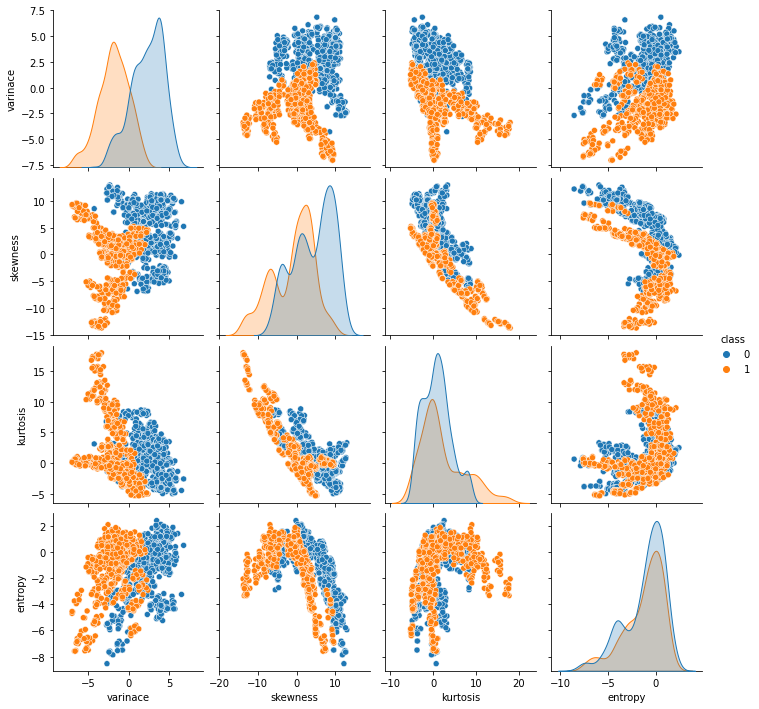

In [15]:
# Import seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# our dataset
banknotes = pd.read_csv('/content/data_banknote_authentication.csv', header = None)
banknotes.columns = ['varinace', 'skewness', 'kurtosis', 'entropy', 'class']

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

# banknotes.info()

Somewhat nice seperation

In [17]:
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [29]:
from sklearn.model_selection import train_test_split
X = banknotes.iloc[:, :4]
y = banknotes[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((891, 4), (481, 4), (891, 1), (481, 1))

In [30]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
28/28 [==============================] - 0s 878us/step - loss: 0.0996 - accuracy: 0.9798
Epoch 2/20
28/28 [==============================] - 0s 875us/step - loss: 0.0978 - accuracy: 0.9798
Epoch 3/20
28/28 [==============================] - 0s 938us/step - loss: 0.0963 - accuracy: 0.9798
Epoch 4/20
28/28 [==============================] - 0s 890us/step - loss: 0.0948 - accuracy: 0.9798
Epoch 5/20
28/28 [==============================] - 0s 862us/step - loss: 0.0934 - accuracy: 0.9809
Epoch 6/20
28/28 [==============================] - 0s 910us/step - loss: 0.0921 - accuracy: 0.9809
Epoch 7/20
28/28 [==============================] - 0s 846us/step - loss: 0.0908 - accuracy: 0.9809
Epoch 8/20
28/28 [==============================] - 0s 980us/step - loss: 0.0896 - accuracy: 0.9809
Epoch 9/20
28/28 [==============================] - 0s 887us/step - loss: 0.0885 - accuracy: 0.9809
Epoch 10/20
28/28 [==============================] - 0s 926us/step - loss: 0.0874 - accuracy: 0.9809

### Multi class classification


> 4 dart throwers. Each thrower throws their dart. Data represented in form of x,y cordinates and label

* output layer activation function is **softmax**.
* loss function : **categorical_crossentropy/logloss**


In [31]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

In [ ]:
# visualize the model
print(model.summary())

print(model.summary())
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

The **softmax** **activation** **function**, for every input of 2 coordinates provided to the model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, the model takes the class with the highest probability as the prediction. **np.argmax()** can help do this since it returns the index with the highest value in an array.

### Multi-label classification
Single input assigned to more than 1 class.

> An irrigation machine: You're going to automate the watering of farm parcels by making an intelligent irrigation machine. 

> Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

> To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

In [32]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape = (20,), activation = 'relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation = 'sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### Keras callbacks

> a keras callback is a block of code that gets executed after each epoch during training or after the training is finished.

In [34]:
# history plotting
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50,  validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['acc'], h_callback.history['val_acc'])

In [33]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks= [monitor_val_acc])

In [35]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [modelCheckpoint, monitor_val_acc],
                    validation_data = (X_test, y_test))